In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Project : https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer

In [2]:
df =pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value']<= df['value'].quantile(0.975))]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

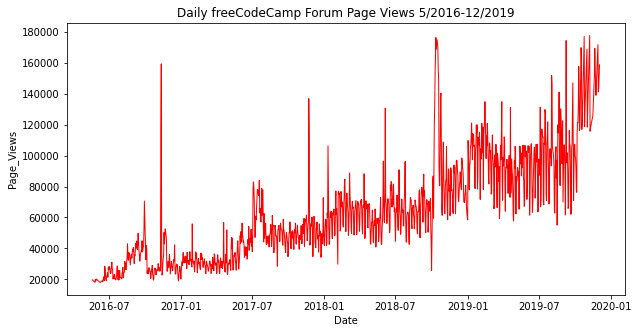

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['value'], 'r', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Page_Views') 
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

In [5]:
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()

C:\Users\andri\AppData\Local\Temp\ipykernel_8068\421463999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
C:\Users\andri\AppData\Local\Temp\ipykernel_8068\421463999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

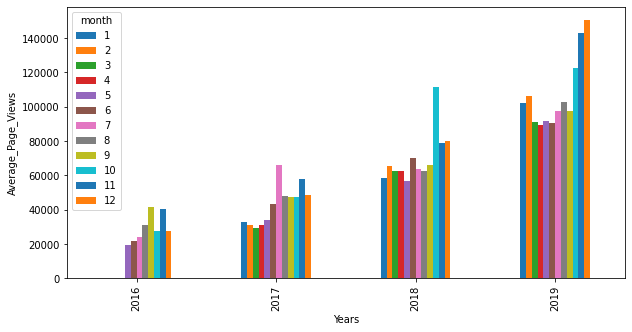

In [6]:
    fig = df_bar.plot.bar(legend=True, figsize=(10,5), ylabel= 'Average_Page_Views', xlabel='Years').figure
    



    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

In [13]:
box = df.copy()
box.reset_index(inplace=True)
lista = []
for i in box['date']:
    lista.append(i.year)
box['year'] = pd.Series(lista)
lista = []
for i in box['date']:
    lista.append(i.month)
box['month'] = pd.Series(lista)

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

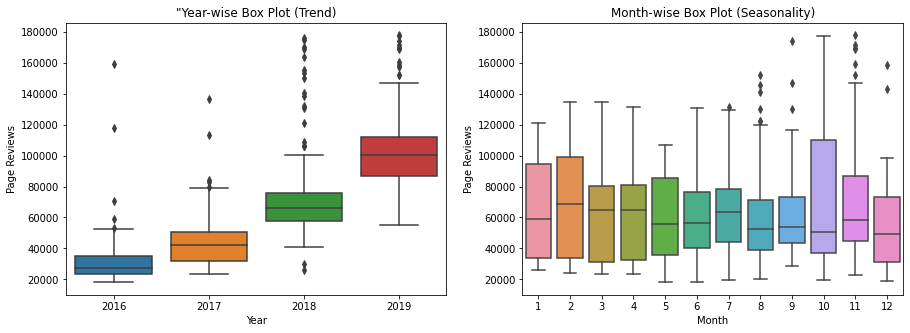

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes1 = sns.boxplot(x=box['year'], y=box['value'], ax=axes[0])
axes2 = sns.boxplot(x=box['month'], y=box['value'], ax=axes[1])
axes1.set_ylabel('Page Reviews')
axes1.set_xlabel('Year')
axes1.set_title('"Year-wise Box Plot (Trend)')
axes2.set_ylabel('Page Reviews')
axes2.set_xlabel('Month')
axes2.set_title('Month-wise Box Plot (Seasonality)')